In [1]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/Churn_Modelling.csv')

In [3]:
# Get unique count for each variable
df.nunique()

,0
Unnamed: 0,10000
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382


In [4]:
Customer_id = df['CustomerId']

In [5]:
#Drop redundant columns
df = df.drop(['Unnamed: 0' , 'RowNumber' , 'CustomerId','Surname'] , axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Gender           9999 non-null   object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,1
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [8]:
#Check percentage of na's
df.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,1
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [9]:
##Fill categoric column with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

In [10]:
##Check na
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [11]:
#Check na's by percentag
df.isnull().mean()

,0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0
HasCrCard,0.0
IsActiveMember,0.0
EstimatedSalary,0.0


In [12]:
##Save dataset
df.to_csv('df.clear.csv')

In [13]:
## Check descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [14]:
df.shape

(10000, 11)

# Explanotary Data Analysis (EDA)

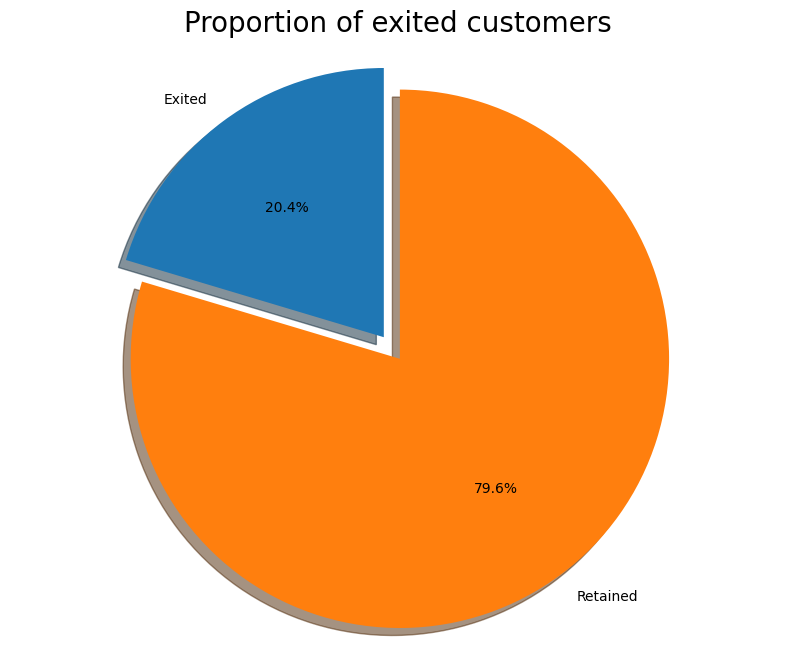

In [15]:
##Pie chart
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of exited customers", size = 20)
plt.show()

In [16]:
##Categoric variable analysis
#Geography and exited
g = df.groupby('Geography')['Exited'].agg(['count', 'sum'])
g.index.name = None
g['Perc'] = g['sum']/g['count']
g

,count,sum,Perc
France,5014,810,0.161548
Germany,2509,814,0.324432
Spain,2477,413,0.166734


In [17]:
##Analyse gender and Exited
ge = df.groupby('Gender')['Exited'].agg(['count', 'sum'])
ge.index.name = None
ge['Perc'] = ge['sum']/ge['count']
ge

,count,sum,Perc
Female,4542,1139,0.250771
Male,5458,898,0.164529


In [18]:
## Has cr card and exited
cr = df.groupby('HasCrCard')['Exited'].agg(['count', 'sum'])
cr.index.name = None
cr['Perc'] = cr['sum']/cr['count']
cr

,count,sum,Perc
0,2945,613,0.208149
1,7055,1424,0.201843


In [19]:
#Check by active member
am = df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum'])
am.index.name = None
am['Perc'] = cr['sum']/cr['count']
am

,count,sum,Perc
0,4849,1302,0.208149
1,5151,735,0.201843


<Axes: xlabel='IsActiveMember', ylabel='count'>

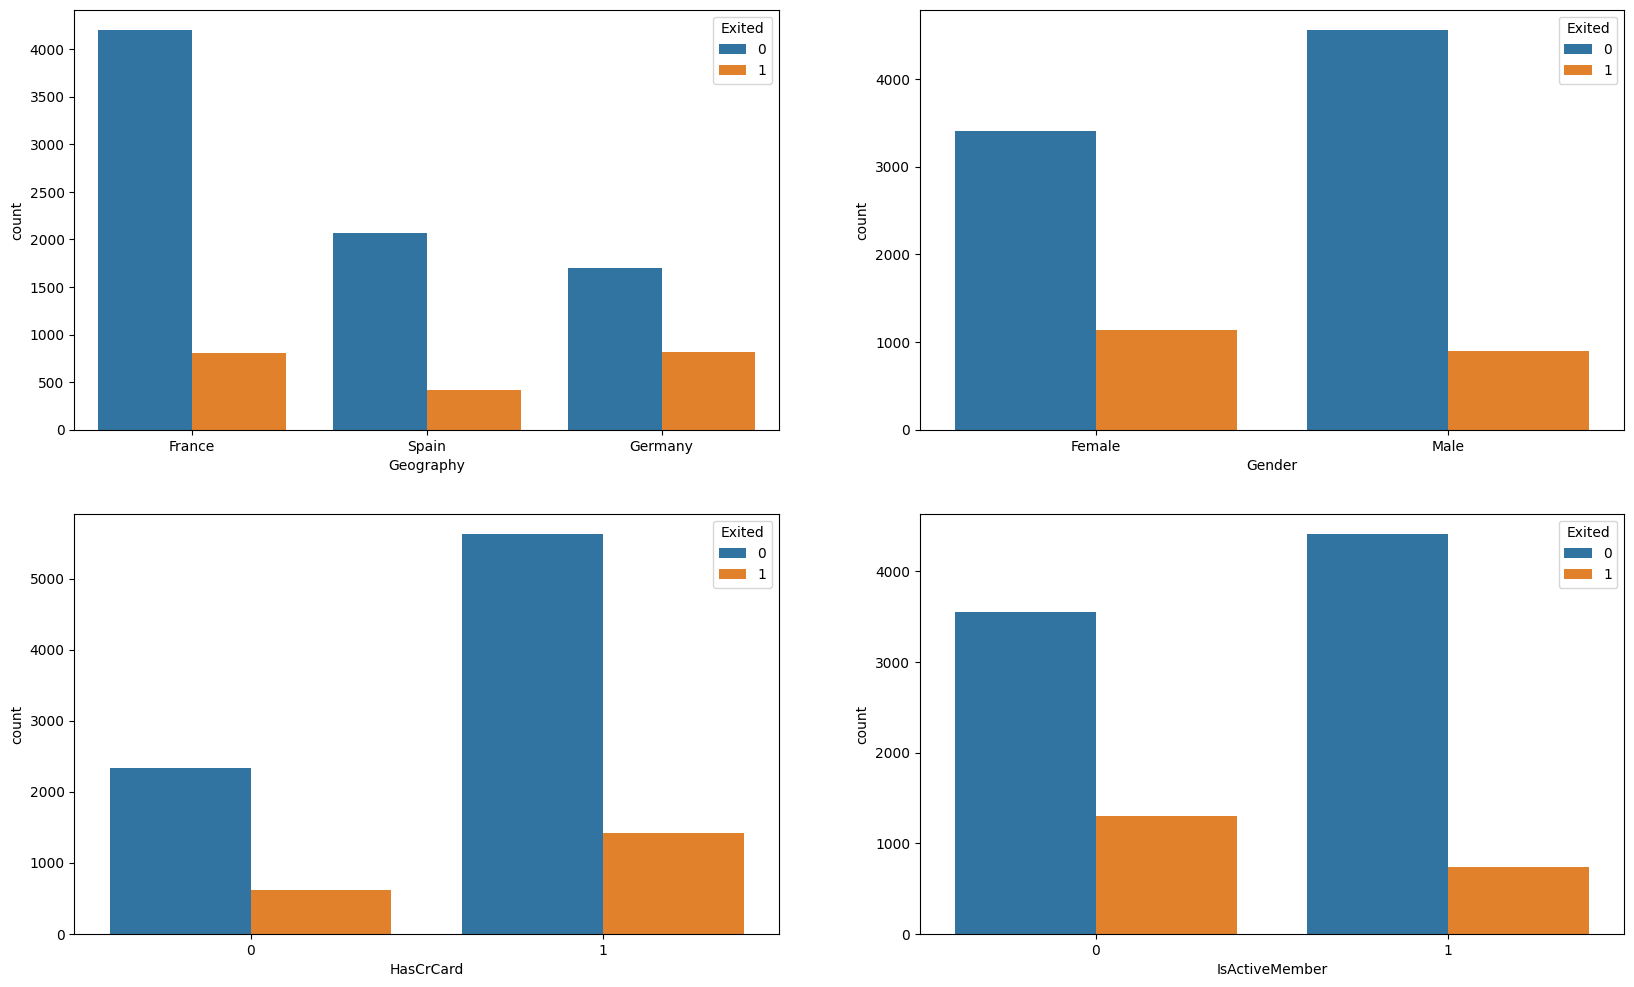

In [20]:
    # Check total visuals
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [21]:
#Creating dummy variables(One hot encoding)
#Make sure you run it once
categorical_cols = df.select_dtypes(include='object').columns
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True, dtype=int)
df = df.drop(columns=categorical_cols)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
#Define X and y
y = df["Exited"]
X = df.drop(["Exited"], axis=1)

In [23]:
#Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [24]:
##Create Logistic regression model on train set
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model


LogisticRegression(solver='liblinear')

In [58]:
#Make prediction on train_set
predictions_train = loj_model.predict(X_train)
predictions_train

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_probs = loj_model.predict_proba(X_train)
y_probs = y_probs[:,1]
y_probs

array([0.21157994, 0.18568677, 0.157452  , ..., 0.11605717, 0.27759662,
       0.34685202])

In [60]:
## Evaluate it on train with accuracy
accuracy_score(y_train, predictions_train)

0.784

In [35]:
##Make prediction for test set
predictions_test = loj_model.predict(X_test)


In [36]:
##Evaluate it on test set
accuracy_score(y_test, predictions_test)

0.8

In [52]:
y_test.shape

(3000,)

In [49]:
print("\nClassification Report:\n", classification_report(y_test, predictions_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.43      0.09      0.15       584

    accuracy                           0.80      3000
   macro avg       0.62      0.53      0.52      3000
weighted avg       0.74      0.80      0.74      3000



In [57]:
#COnfusion Matrix

In [56]:
cm = confusion_matrix(y_test, predictions_test)

# Create labeled DataFrame
cm_df = pd.DataFrame(
    cm,
    index=['Actual_0', 'Actual_1'],        # rows = actual labels
    columns=['Predicted_0', 'Predicted_1'] # cols = predicted labels
)

print("Confusion Matrix:")
print(cm_df)

# Optional: Extract TP, TN, FP, FN for binary classification
tn, fp, fn, tp = cm.ravel()
print(f"\nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

Confusion Matrix:
          Predicted_0  Predicted_1
Actual_0         2347           69
Actual_1          531           53

TN: 2347, FP: 69, FN: 531, TP: 53


In [37]:
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
X_test['preds'] = predictions_test

In [40]:
X_test.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,preds
6252,596,32,3,96709.07,2,0,0,41788.37,1,0,1,0
4684,623,43,1,0.00,2,1,1,146379.30,0,0,1,0
1731,601,44,4,0.00,2,1,0,58561.31,0,1,0,0
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,1,0,0
6340,790,37,8,0.00,2,1,1,149418.41,0,1,1,0
576,439,32,3,138901.61,1,1,0,75685.97,0,1,0,0
5202,597,22,6,101528.61,1,1,0,70529.00,1,0,0,0
6363,678,40,4,113794.22,1,1,0,16618.76,0,1,0,0
439,464,42,3,85679.25,1,1,1,164104.74,1,0,0,0


In [41]:
Churns = X_test[(X_test['preds'] == 1)]
Churns.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,preds
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1,1
3337,579,56,4,99340.83,1,0,0,4523.74,0,1,1,1
35,475,45,0,134264.04,1,1,0,27822.99,0,0,0,1
9753,656,68,7,153545.11,1,1,1,186574.68,1,0,1,1
952,571,66,9,111577.01,1,0,1,189271.90,1,0,0,1


In [42]:
Churns.shape

(122, 12)

In [43]:
Customer_id[Churns.index]

,CustomerId
4742,15762134
3337,15647385
35,15794171
9753,15705174
952,15606149
7058,15671769
8965,15811032
2908,15570769
416,15720559
7548,15658504


In [44]:
Churn_customers_id = Customer_id[Churns.index]

In [45]:
Churn_customers_id.to_csv('churns.csv')

# Random Forest

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])   # all other columns are features
y = df['Exited']                  # target variable

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Initialize and train Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None, #The tree grows as deep as possible (may overfit on training data).
    min_samples_split=10,
    min_samples_leaf=5, #
    random_state=42
)
rf_model = rf.fit(X_train, y_train)

# 3️⃣ Make predictions
predictions_test = rf_model.predict(X_test)

# 4️⃣ Evaluate model performance
acc = accuracy_score(y_test, predictions_test)
cm = confusion_matrix(y_test, predictions_test)
report = classification_report(y_test, predictions_test)

print(f"Accuracy: {acc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 0.8673

Confusion Matrix:
 [[2336   80]
 [ 318  266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [71]:
## FOR OVERFITTING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])   # all other columns are features
y = df['Exited']                  # target variable

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Initialize and train Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # tree grows fully (may overfit)
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model = rf.fit(X_train, y_train)

# 3️⃣ Make predictions for both train and test
predictions_train = rf_model.predict(X_train)
predictions_test = rf_model.predict(X_test)

# 4️⃣ Evaluate model performance
acc_train = accuracy_score(y_train, predictions_train)
acc_test = accuracy_score(y_test, predictions_test)
cm_train = confusion_matrix(y_train, predictions_train)
cm_test = confusion_matrix(y_test, predictions_test)

print(f"🔹 Train Accuracy: {acc_train:.4f}")
print(f"🔹 Test Accuracy:  {acc_test:.4f}")

print("\n=== Train Classification Report ===")
print(classification_report(y_train, predictions_train))

print("Train Confusion Matrix:\n", cm_train)

print("\n=== Test Classification Report ===")
print(classification_report(y_test, predictions_test))

print("Test Confusion Matrix:\n", cm_test)

🔹 Train Accuracy: 0.9053
🔹 Test Accuracy:  0.8673

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5547
           1       0.92      0.60      0.72      1453

    accuracy                           0.91      7000
   macro avg       0.91      0.79      0.83      7000
weighted avg       0.91      0.91      0.90      7000

Train Confusion Matrix:
 [[5468   79]
 [ 584  869]]

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

Test Confusion Matrix:
 [[2336   80]
 [ 318  266]]


#Xgboost
##It’s an optimized implementation of Gradient Boosting, designed for speed and performance.
###It’s widely used in Kaggle competitions, industry projects, and research, because it delivers:
###High accuracy
###Fast training speed
###Good handling of missing data and outliers
###Built-in regularization to prevent overfitting

###XGBoost stands for Extreme Gradient Boosting.
###Boosting = building a strong model by combining many weak models (usually decision trees).
###Each new tree is trained to fix the errors made by the previous ones.
###Gradient Boosting specifically uses gradient descent to minimize errors.
#XGBoost builds trees step-by-step, and at each step:
###It looks at where the model makes mistakes.
###It builds a new tree to correct those mistakes.
###It combines all trees for the final prediction.

Let’s say you’re predicting house prices.

Start with a simple model (like predicting the average price).

Calculate errors (difference between predicted and actual prices).

Build a small decision tree that predicts those errors.

Add the new tree’s predictions to improve the old model.

Repeat steps 2–4 many times (each tree fixes the previous model’s mistakes).

Combine all trees for the final result.

This is “boosting.”

🪵 Random Forest = Many independent trees that vote together → stable, simple, and fast.

⚡ XGBoost = Many dependent trees that learn from each other’s mistakes → more accurate, but more complex.

Random Forest = “A classroom of students answering the same question independently, then taking a majority vote.”

XGBoost = “A classroom where each student learns from the previous one’s mistakes to improve the final answer.”

In Random Forest, trees are independent
IN XGboost, trees are dependent

XGBoost adds learning_rate, regularization (L1/L2), and gamma, which don’t exist in Random Forest.

XGBOOST ✅ Handles missing values automatically. During training, it learns the best direction (left or right) to take when a feature is missing.
Less robust to outliers, because boosting focuses on correcting errors, and outliers create large errors that can distort learning
RANDOM FOREST ❌ Does not handle missing values automatically. You must fill or impute them before training (e.g., with mean, median, or mode).
Fairly robust to outliers, because Random Forest averages many trees → single outlier doesn’t influence much.


###🔹 Random Forest avoids overfitting through randomness and averaging.
###🔹 XGBoost can overfit because it learns sequentially, but offers strong regularization tools to control it.

# Hyperparameters of Xgboost

In [ ]:
Main Parameters :
max_depth  ---> Maximum depth of each decision tree (how many splits a tree can make).
🔹 Higher = more complex model → can overfit.
🔹 Lower = simpler model → might underfit.
🔹3–10 is common.
🔹Start around 5 or 6.

learning_rate --->    Controls how much each new tree contributes to the model.
🔹 Lower = slower learning but more accurate.
🔹 Higher = faster learning but may overfit.
🔹0.01–0.3 typical.
🔹Start with 0.1, lower it if overfitting.

n_estimators ------> Number of boosting rounds (trees).
🔹 More trees = better performance (to a point).
🔹 Too many → longer training, risk of overfitting (if learning_rate is high).
🔹Usually 100–1000.
🔹Use early stopping to find the best value.

subsample   ---- >>> Fraction of training samples used for each tree.
🔹 Adds randomness.
🔹 Lower = prevents overfitting.
🔹 Too low = underfitting.
🔹0.5–1.0.
🔹Try 0.8 as a good default.

colsample_bytree ----> Fraction of features (columns) used per tree.
🔹 Reduces correlation between trees.
🔹 Lower = less overfitting.
🔹 Too low = underfitting.
🔹0.5–1.0.
🔹Common default: 0.8.


reg_alpha (L2 penalty) --->>Higher = stronger regularization → reduces overfitting. reg_alpha encourages sparsity (some features ignored).  reg_alpha: 0–5
reg_lambda :  Penalizes large weights but does not make them zero.   reg_lambda : 1–10


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])   # all other columns are features
y = df['Exited']                  # target variable

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,         # number of trees (boosting rounds)
    learning_rate=0.2,        # step size shrinkage (lower → less overfitting)
    max_depth=6,              # depth of each tree
    subsample=1.0,            # use all data (can reduce to 0.8 to avoid overfitting)
    colsample_bytree=1.0,     # use all features per tree (reduce to 0.8 for regularization)
    reg_alpha=0,              # L1 regularization term
    reg_lambda=1,             # L2 regularization term
    random_state=42,
    use_label_encoder=False,  # avoid warning in newer XGBoost versions
    eval_metric='logloss'     # for classification problems
)

xgb_model.fit(X_train, y_train)

# 3️⃣ Make predictions for both train and test
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

# 4️⃣ Evaluate model performance
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

print(f"🔹 Train Accuracy: {acc_train:.4f}")
print(f"🔹 Test Accuracy:  {acc_test:.4f}")

print("\n=== Train Classification Report ===")
print(classification_report(y_train, pred_train))

print("Train Confusion Matrix:\n", cm_train)

print("\n=== Test Classification Report ===")
print(classification_report(y_test, pred_test))

print("Test Confusion Matrix:\n", cm_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:52:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Train Accuracy: 0.9767
🔹 Test Accuracy:  0.8613

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5547
           1       0.99      0.90      0.94      1453

    accuracy                           0.98      7000
   macro avg       0.98      0.95      0.96      7000
weighted avg       0.98      0.98      0.98      7000

Train Confusion Matrix:
 [[5533   14]
 [ 149 1304]]

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.71      0.49      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

Test Confusion Matrix:
 [[2299  117]
 [ 299  285]]
